In [1]:
import pylab as pl
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("/Users/sripradharavi/Documents/world indicators.csv", thousands=',')

Dropping NaN Columns

In [3]:
data=data.drop(['Business Tax Rate','Hours to do Tax', 'Days to Start Business', 'Ease of Business', 'Number of Records'], 1)


In [4]:
data=data.fillna(0)
Date=pd.to_datetime(data['Year'])
data['year']=Date.dt.year

In [5]:
data.head()

,Country,Region,Year,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,Algeria,Africa,01/12/00,0.020,87931.0,26998.0,5.479006e+10,0.035,60.0,0.034,...,67.0,0.003,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2000
1,Angola,Africa,01/12/00,0.050,9542.0,7499.0,9.129595e+09,0.034,22.0,0.128,...,44.0,0.002,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,2000
2,Benin,Africa,01/12/00,0.043,1617.0,1983.0,2.359122e+09,0.043,15.0,0.090,...,53.0,0.008,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,2000
3,Botswana,Africa,01/12/00,0.027,4276.0,1836.0,5.788312e+09,0.047,152.0,0.054,...,49.0,0.127,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,2000
4,Burkina Faso,Africa,01/12/00,0.046,1041.0,0.0,2.610959e+09,0.051,12.0,0.096,...,49.0,0.002,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,2000


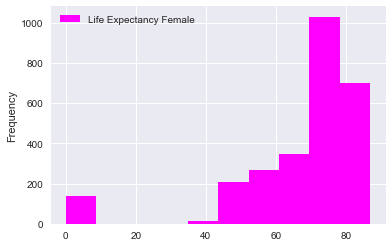

In [6]:
data.plot(kind='hist', x='Mobile Phone Usage', y='Life Expectancy Female', colormap='spring')

In [7]:
data.columns

Index(['Country', 'Region', 'Year', 'Birth Rate', 'CO2 Emissions',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'year'],
      dtype='object')

Which countries spend more than 14% of their GDP on Healthcare? 

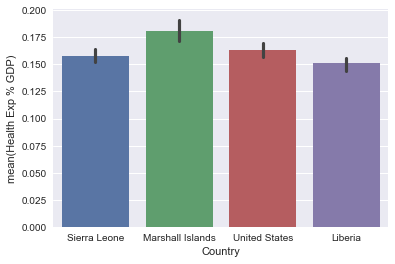

In [8]:
greater_than_14=data[data['Health Exp % GDP']>0.14]
sn.barplot(data=greater_than_14, y='Health Exp % GDP', x='Country')

[<matplotlib.text.Text at 0x114a61390>, <matplotlib.text.Text at 0x114a4eb00>]

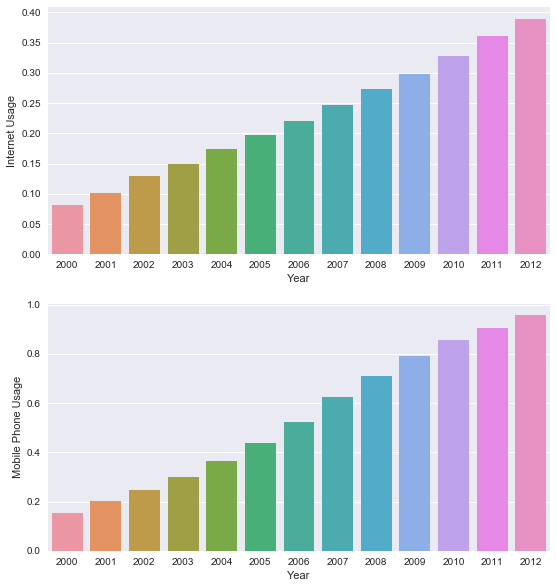

In [9]:
fig, (ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(9,10)
internetAgg=pd.DataFrame(data.groupby("year")["Internet Usage"].mean()).reset_index()
internetSorted=internetAgg.sort_values(by="year", ascending=False)
a=sn.barplot(data=internetSorted,x="year",y="Internet Usage", ax=ax1)
ax1.set(xlabel="Year", ylabel="Internet Usage")

fig.set_size_inches(9,10)
phoneAgg=pd.DataFrame(data.groupby("year")["Mobile Phone Usage"].mean()).reset_index()
phoneSorted=phoneAgg.sort_values(by="year", ascending=False)
b=sn.barplot(data=phoneSorted,x="year",y="Mobile Phone Usage", ax=ax2)
ax2.set(xlabel="Year", ylabel="Mobile Phone Usage")

MULTIPLE LINEAR REGRESSION

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
train=data[:2000]
test=data[2000:]
x=train[['Birth Rate','CO2 Emissions','Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate']]
y=train['Population Total']
xtest=test[['Birth Rate','CO2 Emissions','Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate']]
ytest=test['Population Total']
linReg=smf.ols(formula='y~x', data=train).fit()
linReg.summary()
#linReg=linear_model.LinearRegression()
#linReg.fit(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     636.6
Date:                Fri, 24 Mar 2017   Prob (F-statistic):               0.00
Time:                        14:52:10   Log-Likelihood:                -38945.
No. Observations:                2000   AIC:                         7.791e+04
Df Residuals:                    1992   BIC:                         7.795e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.52e+07   4.75e+06      3.197      0.001      5.87e+06  2.45e+07
x[0]       -6.105e+08   2.56e+08     -2.386      0.017     -1.11e+09 -1.09e+08
x[1]          44.8204     24.904      1.800      0.072        -4.020    93.661
x[2]         734.8870     81.299      9.039      0.000       575.447   894.327
x[3]          -0.0001   4.54e-06    -25.206      0.000        -0.000    -0.000
x[4]       -1.512e+08   5.75e+07     -2.630      0.009     -2.64e+08 -3.85e+07
x[5]        4278.7547   1638.181      2.612      0.009      1066.027  7491.482
x[6]        5.001e+08   1.01e+08      4.969      0.000      3.03e+08  6.98e+08
==============================================================================
Omnibus:                     2229.628   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359282.524
Skew:                           5.336   Prob(JB):                         0.00
Kurtosis:                      67.788   Cond. No.                     1.73e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
ypred=linReg.predict(ytest)

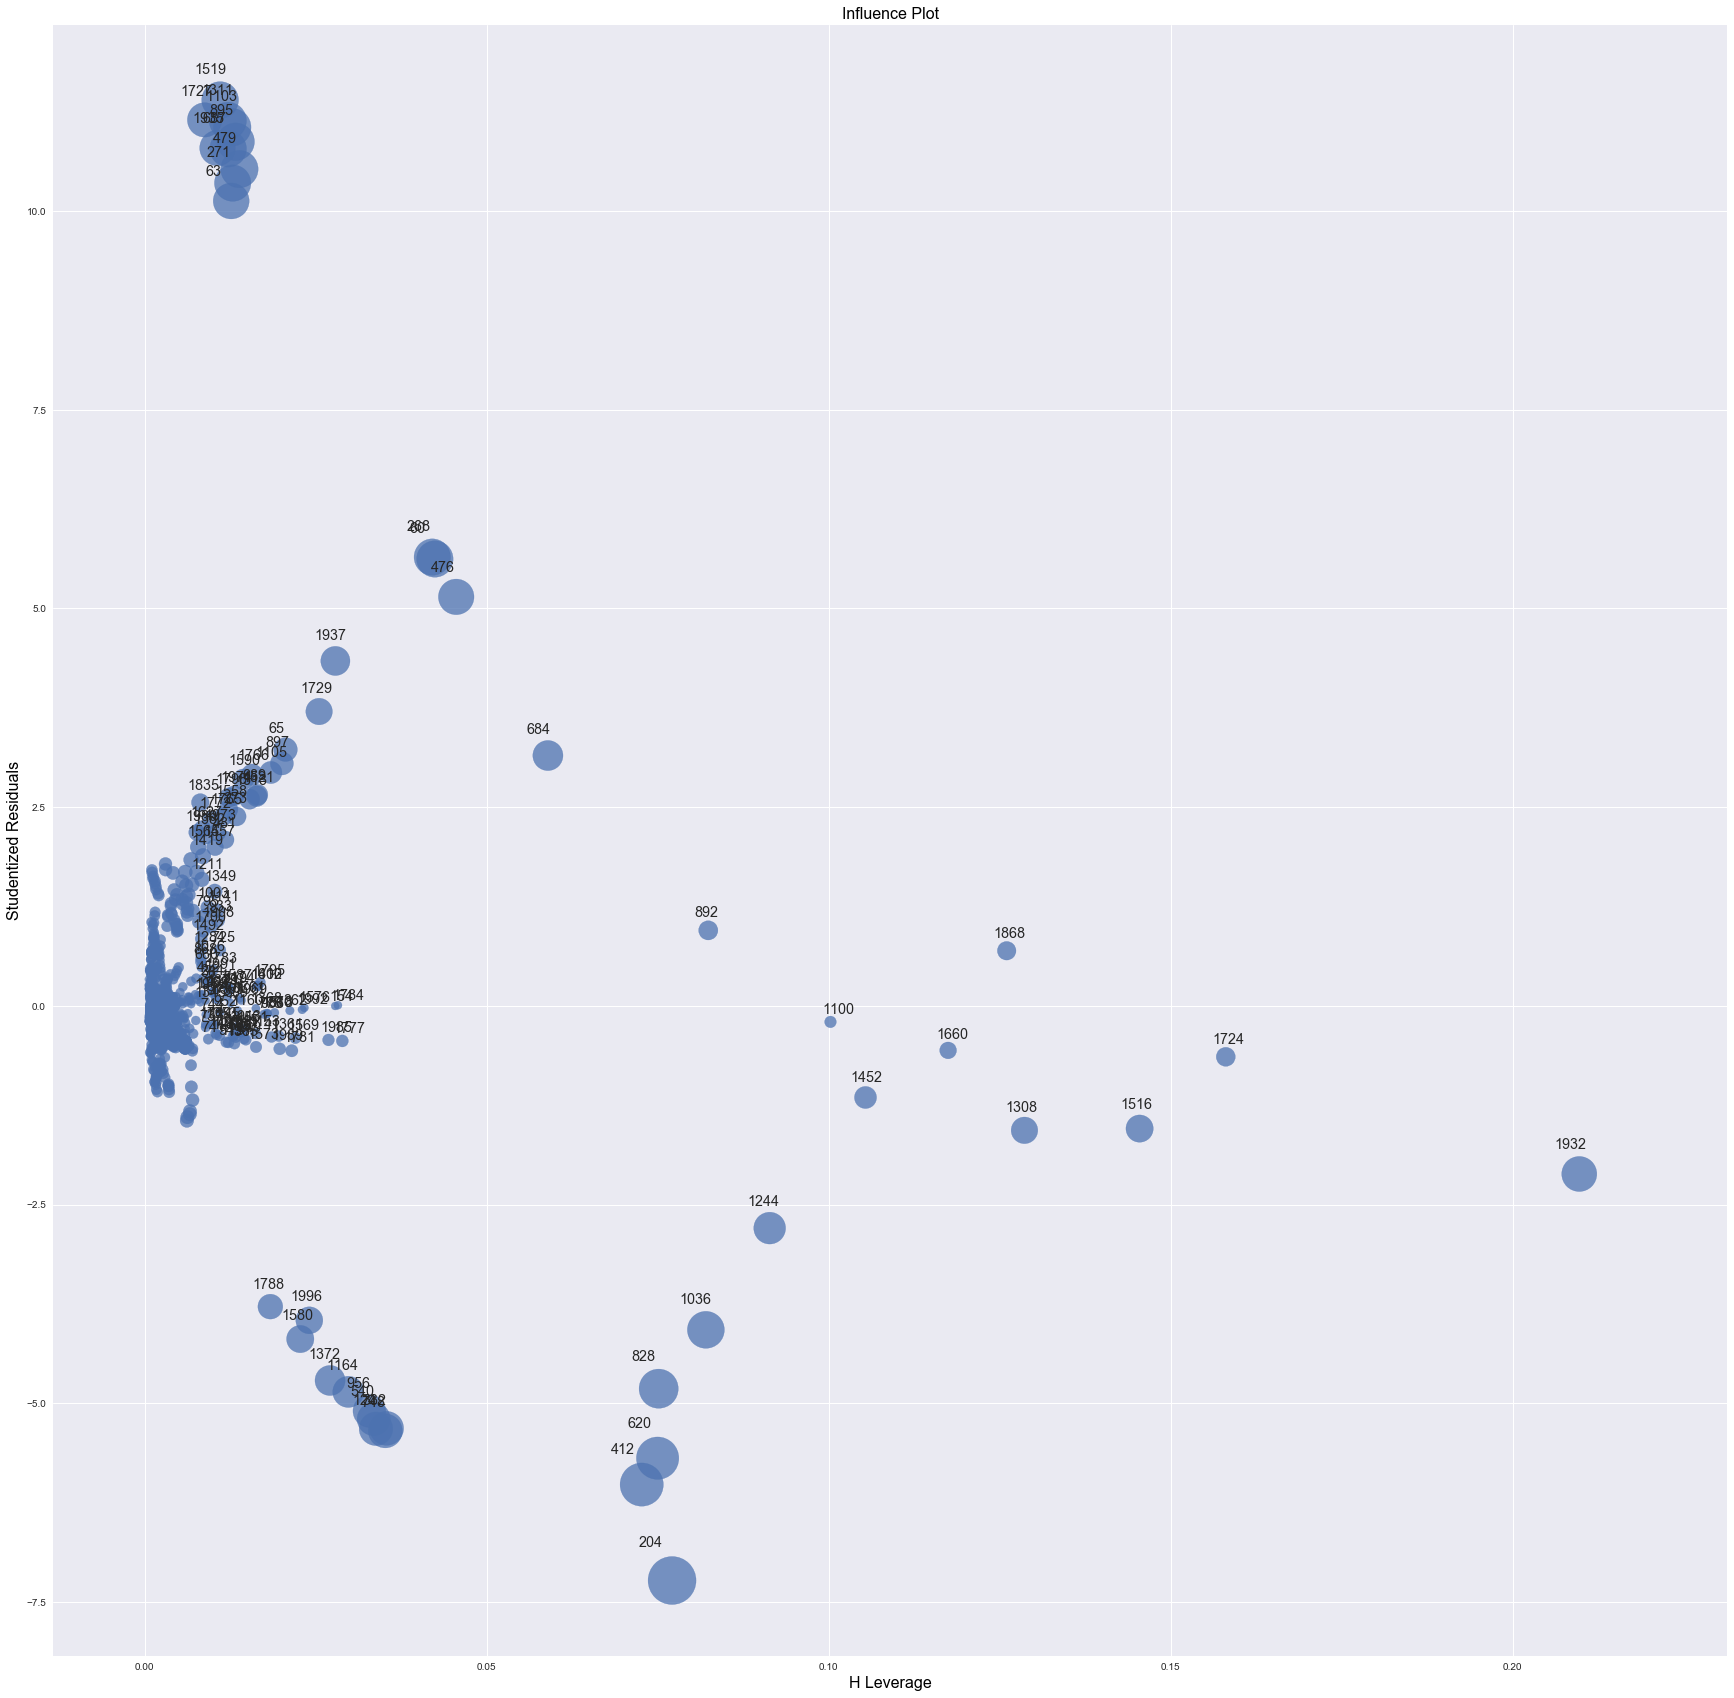

In [13]:
fig, ax=plt.subplots(figsize=(30,30))
fig = sm.graphics.influence_plot(linReg, ax=ax, criterion="cooks")

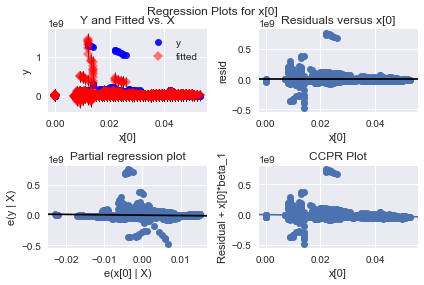

In [31]:
fig.set_size_inches(40,20)
fig = sm.graphics.plot_regress_exog(linReg, 1)

What's the performance of this Multiple Linear Regression: 

Mean Squared Error: 

In [32]:
mean_squared_error(y,ypred)

4797150442270922.0